In [104]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition
import sklearn.cluster

In [105]:
def input_data():
    X = []
    attributes = []
    
    with open("data/wine.csv") as fp:
        for line in fp:
            #print(line)
            X.append([float(i) for i in line.strip().split(',')]) #중요사항: csv데이터는 스트링으로 저장되어 있으므로 숫지(float)형태로 바꿔야 normalize 가능!
    with open("data/attributes.txt")as fp:
        attributes = [i.strip() for i in fp.readlines()]
        #print(attributes)
    
    return np.array(X), attributes

In [106]:
def normalize(X):
    for dim in range(X.shape[1]):
        X[:, dim] = X[:, dim] - np.min(X[:, dim])
        X[:, dim] = X[:, dim] / np.max(X[:, dim])
    return X

In [107]:
def run_PCA(X, num_components):
    pca = sklearn.decomposition.PCA(n_components=num_components)
    pca.fit(X) #X라는 데이터를 해당 pca 모델에 집어넣는다.
    pca_array = pca.transform(X) #실제로 데이터를 변환한다.
    
    return pca, pca_array

In [108]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [115]:
def kmeans(X, K, init_centroid_index):
    '''
    초기화
    '''
    N = len(X)
    centroids = X[init_centroid_index]
    labels = np.zeros(N)
    
    '''
    클러스터링
    '''
    while True:
        change_flag = False
        for i in range(N):
            distances = []
            '''
            한 점과 중심점 사이의 거리를 계산하여 리스트에 넣음.
            '''
            for k in range(K):
                k_dist = distance(X[i], centroids[k])
                distances.append(k_dist)
            
            if labels[i] != np.argmin(distances):
                change_flag = True
                
            '''
            계산된 거리 중 최소 거리를 갖는 중심점의 인덱스를 labels에 저장.
            즉, labels는 각 점이 몇 번째 중심점과 가까운지에 대한 정보를 가진다.
            
            '''
            labels[i] = np.argmin(distances)
            
        '''
        1차적으로 할당된 클러스터를 가지고 새로운 중심점 계산.
        중심점은 클러스터 내 데이터 포인트 위치의 산술 평균
        '''
        for j in range(K):
            x = X[labels == j][:, 0] #한 클러스터 내의 데이터 포인터들의 x좌표
            y = X[labels == j][:, 1]
            
            x = np.mean(x)
            y = np.mean(y)
            
            '''
            중심점 업데이트
            '''
            centroids[j] = [x, y]
            
        '''
        업데이트 종료 조건: 어떤 데이터도 클러스터 할당이 변하지 않을 때
        '''
        if change_flag == False:
            print('Clustering is done')
            break
            
    return labels

In [116]:
def visualize(X, labels):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.savefig("image_clustering_test.svg", format="svg")

In [120]:
def main():
    X, attributes = input_data()
    print(X, attributes)
    print(X.shape)
    print(X.shape[1])
    
    norm_X = normalize(X)
    print(norm_X)
    
    pca, pca_array = run_PCA(norm_X, 2) #데이터를 2차원으로 축소
    #print('pca test', pca_array)
    
    labels = kmeans(pca_array, 3, [0, 1, 2])
    visualize(pca_array, labels)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]] ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
(178, 13)
13
[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]

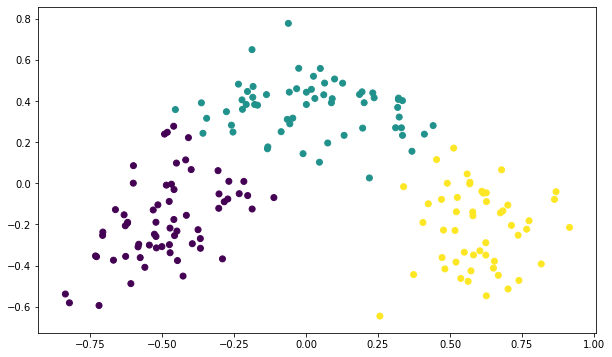

In [121]:
if __name__ == '__main__':
    main()